In [1]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

In [161]:
img_link = 'images/soccer/soccer_00289.png'

In [124]:
#Bilateral filtering

img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

def update(omega=10, sigma_color=20, sigma_space=50):
    
    imgFilt = cv2.bilateralFilter( img, omega, sigma_color, sigma_space)
    iReducFactor = 2
    iStart = iReducFactor // 2
    imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]

    # compute the median of the single channel pixel intensities
    med = np.median( imgReduc)
    
    # apply automatic Canny edge detection using the computed median
    sigma = 0.3
    loThreshold = int( max( 0, (1.0 - sigma) * med))
    hiThreshold = int( min( 255, (1.0 + sigma) * med))

    edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

    # plot all the images
    tools.multiPlot( 1, 1, ( edges,),
                           ( 'Edges',),
                            cmap_tuple=( cm.gray,))
    


interact(update, omega = (10, 200, 5) , sigma_color = (10, 250, 10), sigma_space=(10,250,10))

interactive(children=(IntSlider(value=10, description='omega', max=200, min=10, step=5), IntSlider(value=20, d…

<function __main__.update(omega=10, sigma_color=20, sigma_space=50)>

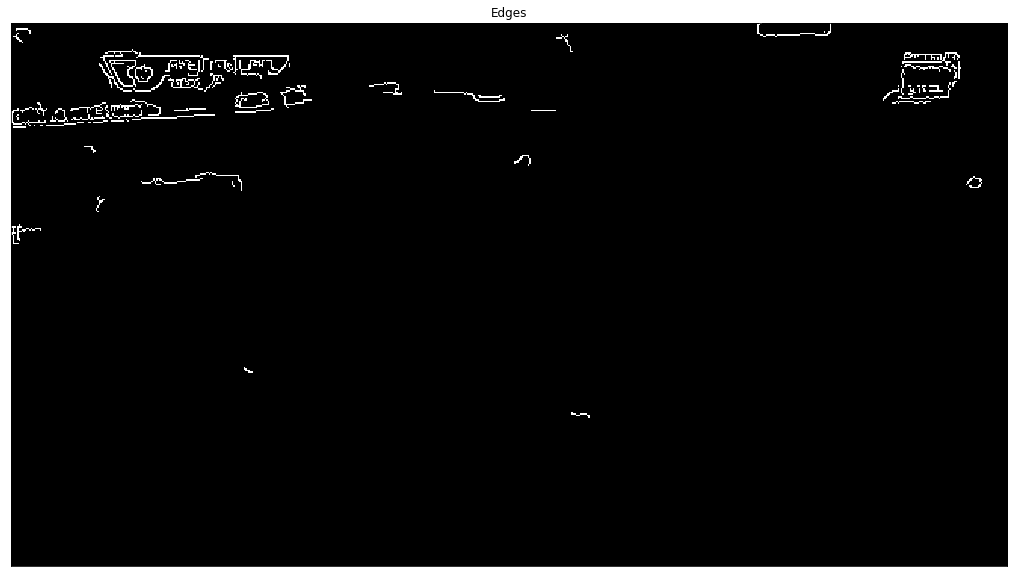

In [125]:
# prefiltrering and scaling 

img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 5
imgFilt = cv2.bilateralFilter(img, 20, 170, 70)
#imgFilt = cv2.GaussianBlur( biFilt, ( iGausKernelSize, iGausKernelSize), 0)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]
   
# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
 
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

# plot all the images
tools.multiPlot( 1, 1, ( edges,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))

In [126]:
#Hough 

def update(minLineLength=30, maxLineGap=20):
    img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
    for l in lines:
        for x1,y1,x2,y2 in l:
            cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)



    tools.multiPlot(1, 2, (img, edges),
                        ('Original image', 'Canny'),
                        cmap_tuple=(cm.gray, cm.gray))
interact(update, minLineLength = (10, 100, 5), maxLineGap = (1, 30, 1))
edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

interactive(children=(IntSlider(value=30, description='minLineLength', min=10, step=5), IntSlider(value=20, de…

In [127]:
height, width = img.shape[:2]
mat = np.zeros((height,width))
img_black = Image.fromarray(mat, 'RGB')

minLineLength = 30
maxLineGap = 20

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img_black,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),3) 

img_black_test2 = cv2.imwrite('black_img.png', img_black)

img_black2=cv2.imread('black_img.png',cv2.IMREAD_GRAYSCALE)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = img_black2[iStart::iReducFactor, iStart::iReducFactor]

print(imgReduc.shape, edges.shape)

bit_and = cv2.bitwise_and(imgReduc,edges) 

TypeError: img is not a numpy array, neither a scalar

# Après avoir fait les tests ci-dessus

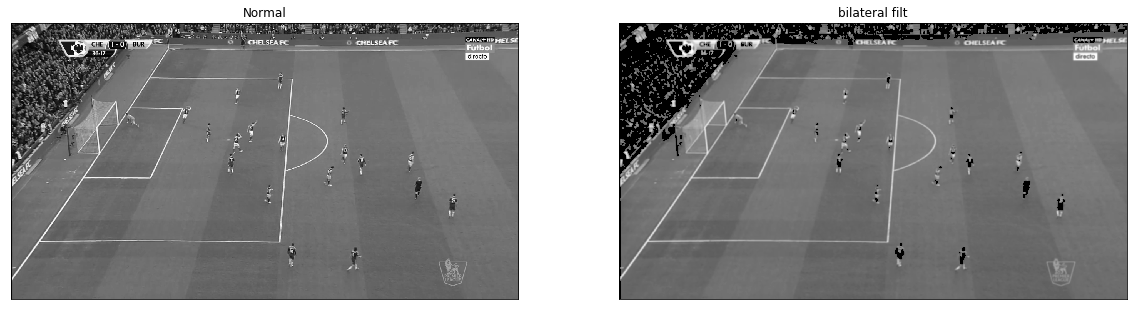

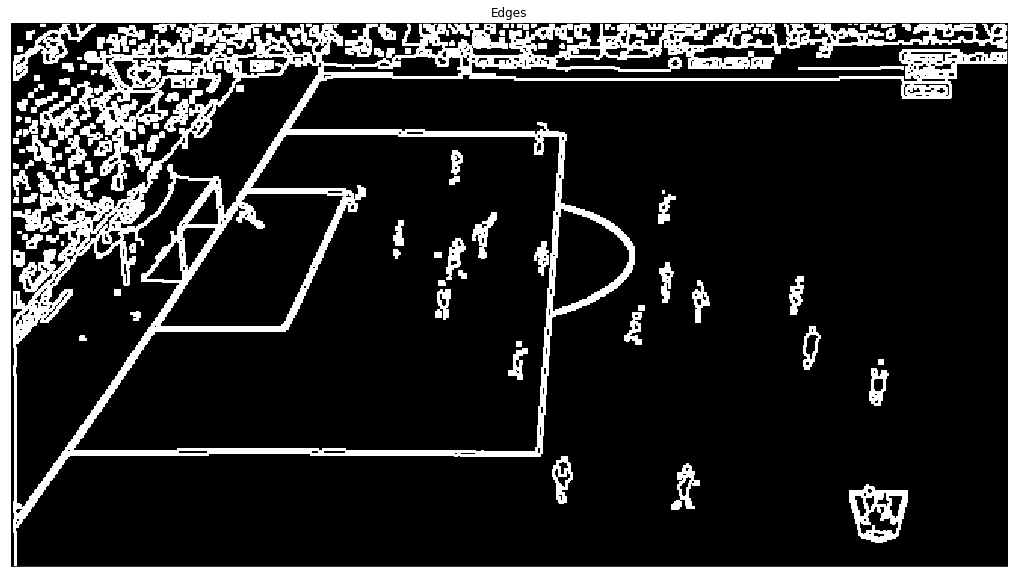

In [162]:
# Apres test
img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

#imgFilt = cv2.bilateralFilter(img, 10, 20, 10)

iGausKernelSize = 7
imgFilt = cv2.GaussianBlur(img, (iGausKernelSize, iGausKernelSize), 0)

_, imgThres = cv2.threshold(imgFilt, 0, 255, cv2.THRESH_TOZERO+cv2.THRESH_OTSU)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgThres[iStart::iReducFactor, iStart::iReducFactor]
# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
    
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)
edges = cv2.dilate(edges, np.ones((2,2), dtype=np.uint8))
cv2.imwrite('soccer.png', edges)

# plot all the images
tools.multiPlot( 1, 2, (img, imgThres,),
                       ('Normal', 'bilateral filt',),
                        cmap_tuple=(cm.gray, cm.gray,))

tools.multiPlot(1, 1, (edges,), ('Edges',), cmap_tuple=(cm.gray,))

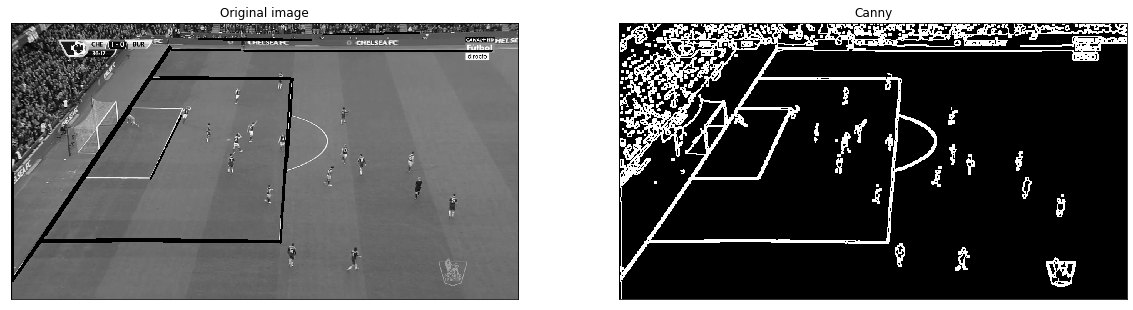

In [163]:
img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
Max_gap = 2
Min_length = 75
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)



tools.multiPlot(1, 2, (img, edges),
                     ('Original image', 'Canny'),
                     cmap_tuple=(cm.gray, cm.gray))


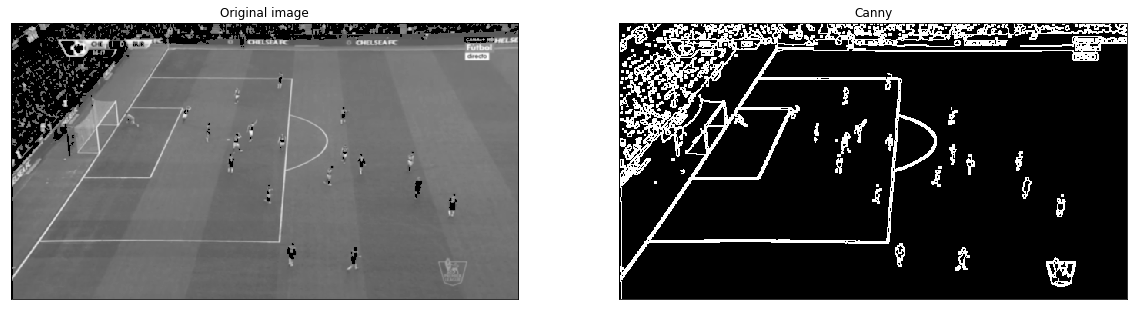

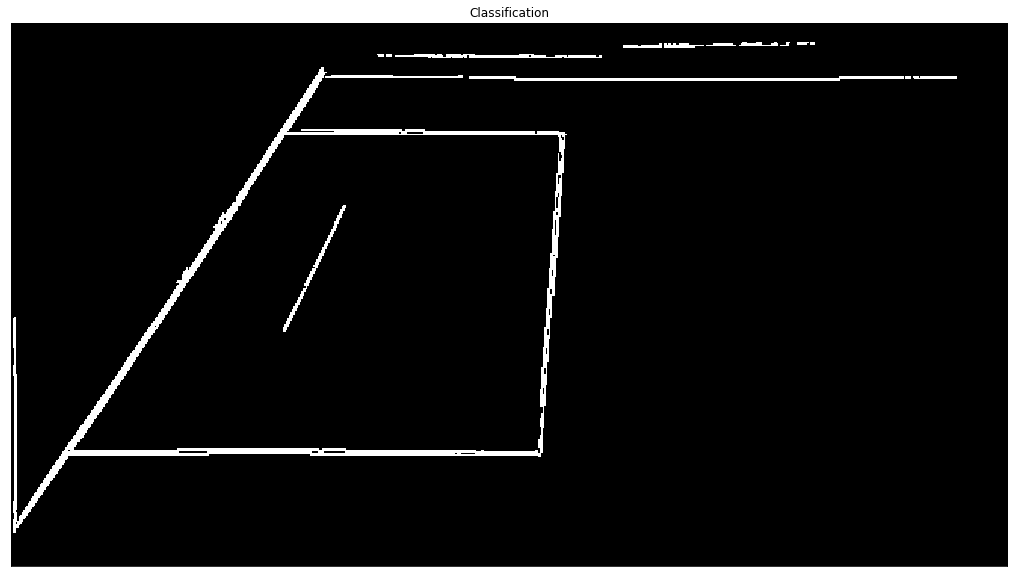

In [164]:
height, width = img.shape[:2]
mat = np.zeros((height,width))

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(mat,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),3) 

iReducFactor = 2
iStart = iReducFactor // 2
blackReduc = mat[iStart::iReducFactor, iStart::iReducFactor]

tools.multiPlot(1, 2, (imgReduc, edges),
                        ('Original image', 'Canny'),
                        cmap_tuple=(cm.gray, cm.gray))


blackReduc = blackReduc.astype('uint8')

img_and = cv2.bitwise_and(blackReduc, edges)

dilated = cv2.dilate(img_and, np.ones((1,1), dtype=np.uint8))

tools.multiPlot(1, 1, (dilated,), ('Classification',), cmap_tuple=(cm.gray,))

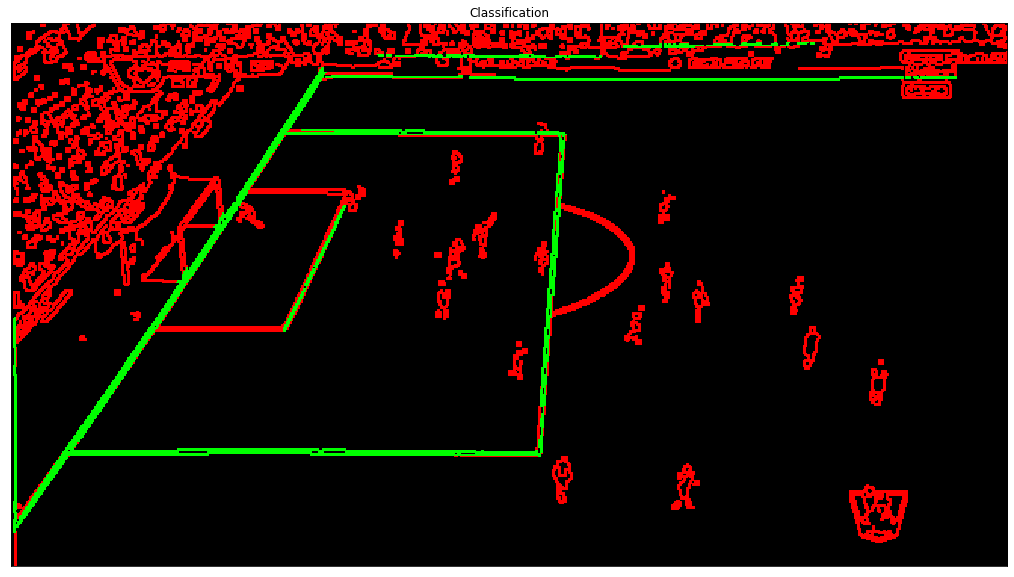

In [165]:
colored = np.zeros((dilated.shape[0], dilated.shape[1], 3), dtype='uint8')

colored[:,:,0] = edges
colored[:,:,0] -= dilated
colored[:,:,1] = dilated

tools.multiPlot(1, 1, (colored,), ('Classification',), cmap_tuple=(cm.gray,))